In [ ]:
# ✅ 한글 폰트 설치 (NanumGothic)
!apt-get update -qq
!apt-get install -y fonts-nanum

# ✅ matplotlib 폰트 캐시 삭제
import os
os.system('rm -rf ~/.cache/matplotlib')

print("✅ 폰트 설치 완료! 이제 런타임 > 다시 시작(ctrl+M+.) 을 꼭 해주세요.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
✅ 폰트 설치 완료! 이제 런타임 > 다시 시작(ctrl+M+.) 을 꼭 해주세요.


In [ ]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os


# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation
# Convolutional Layer
# 합성곱을 수행하는 레이어
# Convolutionla Layer 를 사용하는 신경망을 CNN이라고 부른다.
# 커널에 설정되어 있는 가중치 값에 따라서 특정 부분의 값을 낮추고 특정 부분의 값을 키워서
# 특성이 잘 드러나게 하는 역할을 수행한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
# MaxPooling
# Convolutional Layer를 통과한 데이터에서 큰 부분만 취하는 역할을 수행한다.
# 필요한 특성을 나타내는 부분을 취하고 나머지는 버리는 효과를 얻게 된다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D
# 다차원의 데이터를 1차원 데이터로 변환시켜준다.
# 선형회귀 레이어로 가기전에 두어야 한다.
from tensorflow.keras.layers import Flatten
# Dropout : 데이터 하나가 들어오면 레이어의 모든 노드가 그 데이터를 학습하게 된다.
# 그렇기 때문에 모든 가중치 값이 데이터에 영향을 받아서 변경된다.
# 만약 각 노드들이 특정 패턴의 데이터만 학습하고자 한다면 학습시 일부 노드들을 비활성화 시켜서
# 학습에 참여시키지 않게 할 수 있다.
# 전체 데이터에 대해 모든 노드들이 과접합을 되는 것을 예방한다.
from tensorflow.keras.layers import Dropout
# Embedding : 주어진 단어 데이터를 통해 단어 벡터를 생성하는 레이어
# 생성한 벡터 공간의 차원을 매개변수로 받는다.
# 주어진 문장 데이터의 단어 개수가 공간의 차원을 넘어서면 출현 빈도수가 높은 단어들로만
# 구성하여 공간 벡터를 구성한다.
from tensorflow.keras.layers import Embedding
# LSTM : RNN 용 Layer
# 이전에 입력된 데이터와 함께 묶어서 학습할 데이터를 생성하는 방식으로 동작하는 레이어
# 순환신경망. 문장 데이터, 주식시세, 시계열 데이터 등의 데이터 패턴을 보고 다음 데이터를
# 예측하는데 사용한다.
# LSTM은 Long Term Memory와 Short Term Memory를 두어 데이터의 패턴이 좀더 다양하게 생성될 수
# 있도록 하는 특징을 가지고 있다.
from tensorflow.keras.layers import LSTM

# GAN
# GAN에서 사용하는 활성화 함수
from tensorflow.keras.layers import LeakyReLU
# 레이어를 통과한 데이터를 다시 표준화하여 학습 효율성을 높히게 한다.
from tensorflow.keras.layers import BatchNormalization
# 레이어를 통과한 데이터의 차원을 변경하기위 사용한다.
from tensorflow.keras.layers import Reshape
# 데이터 업샘플링 - Convolutional Layer가 데이터의 크기를 줄이므로 늘리는 것이 필요하다
from tensorflow.keras.layers import UpSampling2D
# 입력층
from tensorflow.keras.layers import Input
# 딥러닝 모델, GAN은 생성자 신경망과 판별자 신경망을 같이 써야 하기 때문에
# 이 둘을 하나의 신경망으로 합치기 위해 사용한다.
from tensorflow.keras.models import Model


# 다중 분류를 위한 원핫 인코딩
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델 복원
from tensorflow.keras.models import load_model

# epoch마다 모델을 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint
# 조기 중단
from tensorflow.keras.callbacks import EarlyStopping

# 경사하강법
from tensorflow.keras.optimizers import Adam

# 문자열을 잘라낸다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터 수를 동일하게 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 단어 사전으로 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 전이 학습을 위한 사전 학습 모델
from tensorflow.keras.applications import VGG16

# 이미지 데이터를 불러올 때 나눠서 읽어오거나 읽어올때 이미지 데이터를 가공하면서
# 가져울 수 있는 도구
# 이미지가 들어있는 폴더이름이 결과데이터가 됨(그렇기때문에 폴더를 잘 구성해주어야 함)
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.applications import ResNet152

# 출력한 것을 청소하는 함수
from IPython.display import clear_output
# 시간 관련
import time

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [ ]:
all_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/병합_selected_features.csv')
all_df

,ID,Segment,이용금액_오프라인_R3M,이용금액대_ord,정상청구원금_B2M,이용금액_R3M_신용체크,연속유실적개월수_기본_24M_카드,미이용_CA,정상청구원금_B0M,최대이용금액_체크_R12M,...,RP후경과월_전기,이용금액_카드론_R12M,이용건수_체크_R6M,RV_평균잔액_R12M,이용개월수_할부_유이자_R6M,_3순위쇼핑업종_이용금액,잔액_할부_유이자_B0M,잔액_현금서비스_B2M,이용가능여부_해외겸용_본인,RV_최대잔액_R12M
0,TRAIN_000000,D,11756,6,15251,-454,17,0,15067,998,...,6,0,0,0,0,0,0,30640,0,0
1,TRAIN_000001,E,12128,5,2776,7089,17,0,2222,0,...,6,0,0,0,0,517,1491,0,0,0
2,TRAIN_000002,C,24370,6,23325,27336,8,0,26184,0,...,6,0,0,1255,0,1172,0,27654,1,4587
3,TRAIN_000003,D,12529,6,18808,4270,24,0,20959,0,...,6,0,0,0,4,682,2092,28938,1,0
4,TRAIN_000004,E,0,2,0,9385,0,1,639,3910,...,6,0,55,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,TRAIN_399995,E,0,1,0,10755,0,1,19,5072,...,6,0,76,0,0,0,0,0,1,0
399996,TRAIN_399996,D,25205,6,14844,27636,17,1,13462,0,...,6,0,0,0,0,346,0,0,1,0
399997,TRAIN_399997,C,13267,3,6862,23187,24,1,7049,0,...,6,0,0,0,0,305,0,0,1,0
399998,TRAIN_399998,E,0,1,0,0,0,1,0,0,...,6,0,0,0,0,0,0,0,0,0


## 0의 비율이 5% 이상 95%이하 컬럼 선별

In [ ]:
# 분석에서 제외할 컬럼 리스트
exclude_cols = ['ID', 'Segment', '기준년월']

# 0 vs 비0 플래그 대상으로 사용할 수치형 컬럼 리스트
num_cols = [
    col for col in all_df.select_dtypes(include='number').columns
    if col not in exclude_cols
]

# 비0 비율 계산 후, 5% 이상 95% 이하인 컬럼만 선별
ratio = {col: (all_df[col] != 0).mean() * 100 for col in num_cols}
valid_cols = [col for col, pct in ratio.items() if 5 <= pct <= 95]

# 유효 컬럼 목록 출력
display(pd.DataFrame({'비0 비율(%)': [ratio[c] for c in valid_cols]}, index=valid_cols))

# 유효 컬럼들에 대해 EDA 수행
for orig_col in valid_cols:
    # 비0 플래그 생성
    flag_col = f'{orig_col}_flag'
    all_df[flag_col] = (all_df[orig_col] != 0).astype(int)

    # 비0 비율 계산 및 출력
    pct_nonzero = ratio[orig_col]
    display(pd.DataFrame({'비0 비율(%)': [pct_nonzero]}, index=[orig_col]))

    # 비0 그룹 통계 요약 출력
    group_stats = all_df[all_df[flag_col] == 1][orig_col].agg(
        ['count', 'mean', 'median', 'std', 'min', 'max']
    )
    display(group_stats.to_frame(name=f'{orig_col} 비0 그룹 통계'))

    # 세그먼트별 비0 비율 교차표 출력
    cross_tab = pd.crosstab(all_df['Segment'], all_df[flag_col], normalize='index') * 100
    display(cross_tab[1].to_frame(name=f'{orig_col} 비0 비율(%)'))

    # 비0 값 히스토그램 시각화
    non_zero_values = all_df.loc[all_df[flag_col] == 1, orig_col]
    plt.figure(figsize=(6,3))
    plt.hist(non_zero_values, bins=30)
    plt.title(f'{orig_col} 비0 히스토그램')
    plt.xlabel(orig_col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

### 전처리 후 VIF 10이상인 컬럼 제외한 데이터 파일과 전처리 파일의 컬럼을 비교하여 청구/잔액 관련 컬럼찾기

In [ ]:
select_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/최종데이터/청구잔액전처리_최종데이터.csv')
all_selected_features = select_df.columns.to_list()

In [ ]:
# 일치하는 컬럼
matched = [col for col in all_selected_features if col in all_df.columns]

# 누락된 컬럼
missing = [col for col in all_selected_features if col not in all_df.columns]

# 결과 출력
print(f"일치하는 컬럼 수: {len(matched)}")
print(f"누락된 컬럼 수: {len(missing)}")

# 일치하는 컬럼 목록 확인
print("\n일치하는 컬럼명:")
for col in matched:
    print("-", col)

일치하는 컬럼 수: 21
누락된 컬럼 수: 89

일치하는 컬럼명:
- ID
- 청구금액_R3M
- 포인트_포인트_월적립_R3M
- 포인트_적립포인트_R3M
- 마일_적립포인트_R12M
- 할인금액_B0M
- 할인금액_청구서_R3M
- Segment
- 잔액_현금서비스_B2M
- 잔액_카드론_B2M
- 잔액_카드론_B4M
- 잔액_카드론_B5M
- RV_평균잔액_R12M
- RV_최대잔액_R12M
- RV_최대잔액_R3M
- 잔액_할부_유이자_B0M
- 월중평잔_RV일시불
- 평잔_CA_3M
- 평잔_카드론_3M
- 평잔_일시불_6M
- 평잔_카드론_6M


In [ ]:
check_df = all_df[matched]
check_df

,ID,청구금액_R3M,포인트_포인트_월적립_R3M,포인트_적립포인트_R3M,마일_적립포인트_R12M,할인금액_B0M,할인금액_청구서_R3M,Segment,잔액_현금서비스_B2M,잔액_카드론_B2M,...,잔액_카드론_B5M,RV_평균잔액_R12M,RV_최대잔액_R12M,RV_최대잔액_R3M,잔액_할부_유이자_B0M,월중평잔_RV일시불,평잔_CA_3M,평잔_카드론_3M,평잔_일시불_6M,평잔_카드론_6M
0,TRAIN_000000,42163,0,1514,0,0,0,D,30640,0,...,0,0,0,0,0,0,25849,0,2337,0
1,TRAIN_000001,8539,0,0,0,0,490,E,0,0,...,0,0,0,0,1491,2370,0,0,2865,0
2,TRAIN_000002,84250,0,4730,0,0,0,C,27654,0,...,0,1255,4587,6104,0,7371,50796,0,7522,0
3,TRAIN_000003,72964,0,4208,0,0,0,D,28938,0,...,0,0,0,0,2092,0,22068,0,2205,0
4,TRAIN_000004,0,0,0,0,0,0,E,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,TRAIN_399995,0,0,0,0,0,0,E,0,0,...,0,0,0,0,0,0,0,0,0,0
399996,TRAIN_399996,37515,0,8478,0,0,162,D,0,25886,...,30591,0,0,0,0,0,0,16942,12524,23031
399997,TRAIN_399997,22274,0,0,0,0,0,C,0,0,...,0,0,0,0,0,0,0,0,3241,0
399998,TRAIN_399998,0,0,0,0,0,0,E,0,0,...,0,0,0,0,0,0,0,0,0,0


,비0 비율(%)
청구금액_R3M,77.48300
포인트_적립포인트_R3M,17.34350
할인금액_B0M,24.09525
할인금액_청구서_R3M,32.01025
잔액_카드론_B2M,6.03450
잔액_카드론_B4M,6.22825
잔액_카드론_B5M,6.27425
RV_평균잔액_R12M,6.29750
RV_최대잔액_R12M,6.29775
잔액_할부_유이자_B0M,16.24675


,비0 비율(%)
청구금액_R3M,77.483


,청구금액_R3M 비0 그룹 통계
count,309932.000000
mean,19512.261403
median,12074.000000
std,24480.494578
min,10.000000
max,499057.000000


,청구금액_R3M 비0 비율(%)
Segment,
A,100.000000
B,100.000000
C,97.244298
D,95.641418
E,72.858695


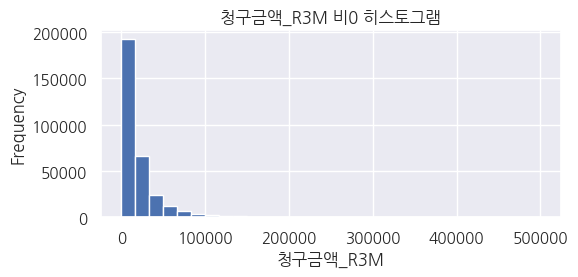

,비0 비율(%)
포인트_적립포인트_R3M,17.3435


,포인트_적립포인트_R3M 비0 그룹 통계
count,69374.000000
mean,7279.034004
median,5565.500000
std,6525.007640
min,-184.000000
max,69561.000000


,포인트_적립포인트_R3M 비0 비율(%)
Segment,
A,29.629630
B,50.000000
C,31.850458
D,28.649475
E,14.317511


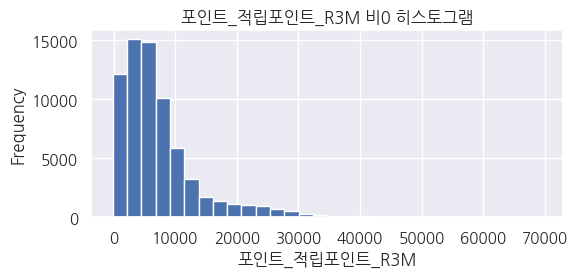

,비0 비율(%)
할인금액_B0M,24.09525


,할인금액_B0M 비0 그룹 통계
count,96381.000000
mean,108.991502
median,113.000000
std,84.187929
min,2.000000
max,437.000000


,할인금액_B0M 비0 비율(%)
Segment,
A,14.197531
B,29.166667
C,32.395956
D,33.276066
E,21.880678


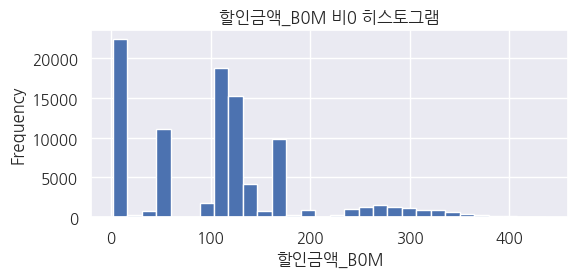

,비0 비율(%)
할인금액_청구서_R3M,32.01025


,할인금액_청구서_R3M 비0 그룹 통계
count,128041.000000
mean,385.348677
median,452.000000
std,309.255894
min,2.000000
max,1779.000000


,할인금액_청구서_R3M 비0 비율(%)
Segment,
A,22.839506
B,41.666667
C,43.136609
D,43.412304
E,29.203788


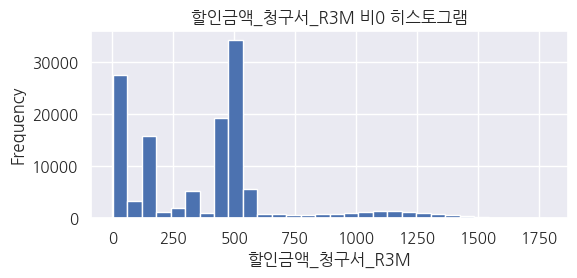

,비0 비율(%)
잔액_카드론_B2M,6.0345


,잔액_카드론_B2M 비0 그룹 통계
count,24138.000000
mean,41973.506131
median,31996.500000
std,31341.481614
min,5360.000000
max,244906.000000


,잔액_카드론_B2M 비0 비율(%)
Segment,
A,8.024691
B,8.333333
C,9.988244
D,9.380315
E,5.162920


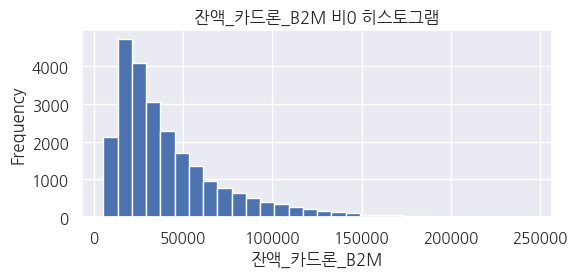

,비0 비율(%)
잔액_카드론_B4M,6.22825


,잔액_카드론_B4M 비0 그룹 통계
count,24913.000000
mean,42465.907719
median,33010.000000
std,30861.835372
min,5670.000000
max,244906.000000


,잔액_카드론_B4M 비0 비율(%)
Segment,
A,7.407407
B,8.333333
C,10.557254
D,9.766867
E,5.297151


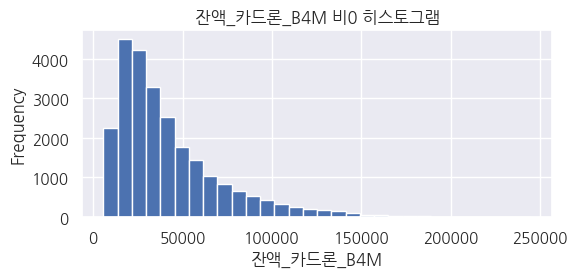

,비0 비율(%)
잔액_카드론_B5M,6.27425


,잔액_카드론_B5M 비0 그룹 통계
count,25097.000000
mean,42758.678049
median,33609.000000
std,30499.092925
min,5159.000000
max,233904.000000


,잔액_카드론_B5M 비0 비율(%)
Segment,
A,8.024691
B,8.333333
C,10.693628
D,9.854485
E,5.329304


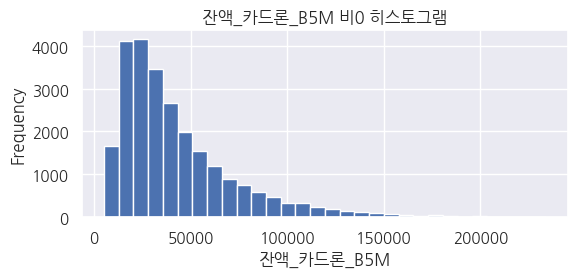

,비0 비율(%)
RV_평균잔액_R12M,6.2975


,RV_평균잔액_R12M 비0 그룹 통계
count,25190.000000
mean,7333.697856
median,768.000000
std,11201.019635
min,111.000000
max,94779.000000


,RV_평균잔액_R12M 비0 비율(%)
Segment,
A,8.024691
B,8.333333
C,9.673172
D,10.895597
E,5.236903


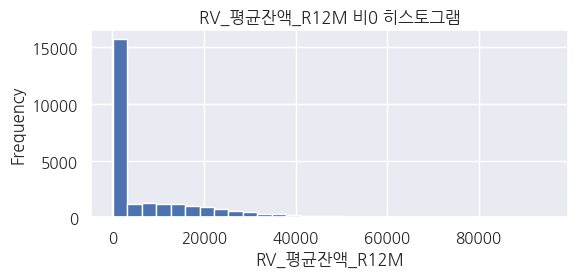

,비0 비율(%)
RV_최대잔액_R12M,6.29775


,RV_최대잔액_R12M 비0 그룹 통계
count,25191.000000
mean,11712.020404
median,3921.000000
std,12972.385447
min,1054.000000
max,89512.000000


,RV_최대잔액_R12M 비0 비율(%)
Segment,
A,8.024691
B,8.333333
C,9.677874
D,10.899033
E,5.236279


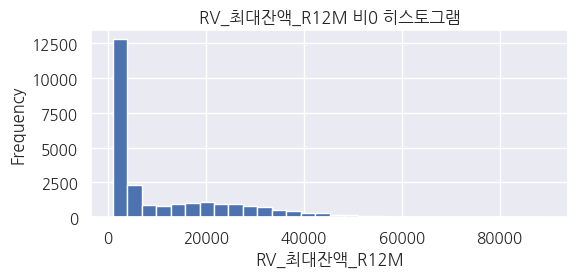

,비0 비율(%)
잔액_할부_유이자_B0M,16.24675


,잔액_할부_유이자_B0M 비0 그룹 통계
count,64987.000000
mean,3137.859341
median,2475.000000
std,2123.997654
min,685.000000
max,28160.000000


,잔액_할부_유이자_B0M 비0 비율(%)
Segment,
A,12.345679
B,12.500000
C,23.884317
D,24.909375
E,14.167983


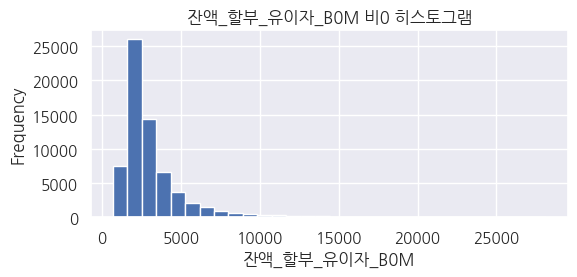

,비0 비율(%)
월중평잔_RV일시불,15.80475


,월중평잔_RV일시불 비0 그룹 통계
count,63219.000000
mean,6102.387621
median,2794.000000
std,10071.254308
min,152.000000
max,136073.000000


,월중평잔_RV일시불 비0 비율(%)
Segment,
A,18.518519
B,33.333333
C,21.871620
D,25.082894
E,13.713469


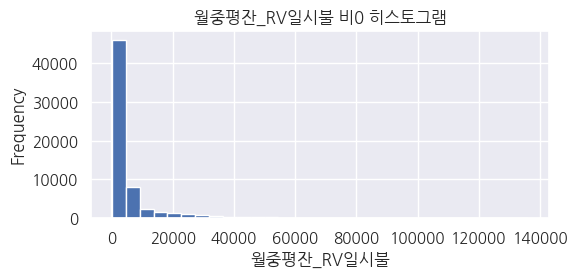

,비0 비율(%)
평잔_CA_3M,8.0285


,평잔_CA_3M 비0 그룹 통계
count,32114.000000
mean,11291.316248
median,4912.000000
std,14726.415598
min,474.000000
max,141304.000000


,평잔_CA_3M 비0 비율(%)
Segment,
A,29.629630
B,50.000000
C,24.495650
D,16.228289
E,5.431383


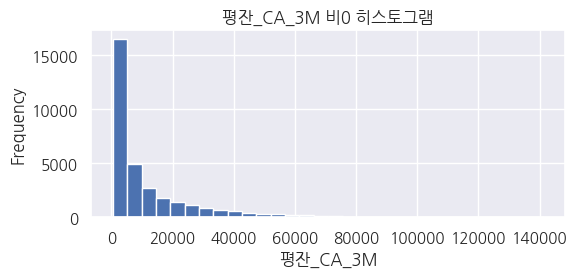

,비0 비율(%)
평잔_카드론_3M,6.4865


,평잔_카드론_3M 비0 그룹 통계
count,25946.000000
mean,40951.240962
median,27103.500000
std,40200.034249
min,1888.000000
max,230000.000000


,평잔_카드론_3M 비0 비율(%)
Segment,
A,8.641975
B,12.500000
C,10.952269
D,10.105314
E,5.530964


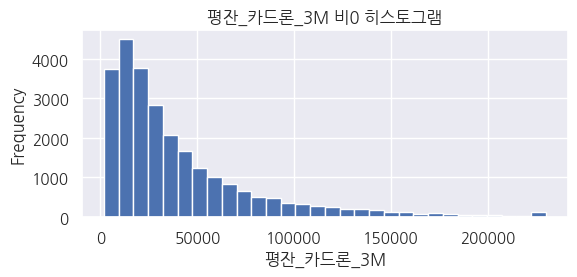

,비0 비율(%)
평잔_일시불_6M,79.0305


,평잔_일시불_6M 비0 그룹 통계
count,316122.000000
mean,5624.235846
median,2976.000000
std,8450.060143
min,2.000000
max,176861.000000


,평잔_일시불_6M 비0 비율(%)
Segment,
A,100.000000
B,100.000000
C,96.741124
D,95.648290
E,74.823158


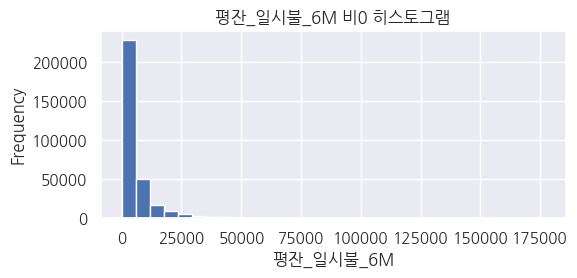

,비0 비율(%)
평잔_카드론_6M,7.0855


,평잔_카드론_6M 비0 그룹 통계
count,28342.000000
mean,43863.456602
median,28419.500000
std,43696.634841
min,1488.000000
max,225000.000000


,평잔_카드론_6M 비0 비율(%)
Segment,
A,9.259259
B,16.666667
C,12.170233
D,11.125810
E,6.012012


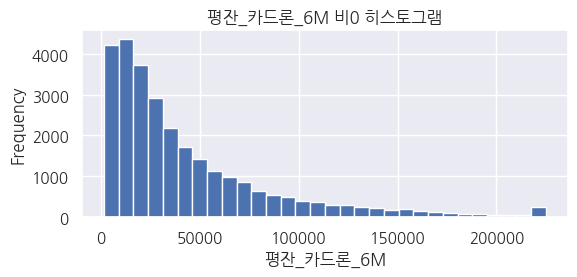

In [ ]:
# 분석에서 제외할 컬럼 리스트
exclude_cols = ['ID', 'Segment', '기준년월']

# 0 vs 비0 플래그 대상으로 사용할 수치형 컬럼 리스트
num_cols = [
    col for col in check_df.select_dtypes(include='number').columns
    if col not in exclude_cols
]

# 비0 비율 계산 후, 5% 이상 95% 이하인 컬럼만 선별
ratio = {col: (check_df[col] != 0).mean() * 100 for col in num_cols}
valid_cols = [col for col, pct in ratio.items() if 5 <= pct <= 95]

# 유효 컬럼 목록 출력
display(pd.DataFrame({'비0 비율(%)': [ratio[c] for c in valid_cols]}, index=valid_cols))

# 유효 컬럼들에 대해 EDA 수행
for orig_col in valid_cols:
    # 비0 플래그 생성
    flag_col = f'{orig_col}_flag'
    check_df[flag_col] = (check_df[orig_col] != 0).astype(int)

    # 비0 비율 계산 및 출력
    pct_nonzero = ratio[orig_col]
    display(pd.DataFrame({'비0 비율(%)': [pct_nonzero]}, index=[orig_col]))

    # 비0 그룹 통계 요약 출력
    group_stats = check_df[check_df[flag_col] == 1][orig_col].agg(
        ['count', 'mean', 'median', 'std', 'min', 'max']
    )
    display(group_stats.to_frame(name=f'{orig_col} 비0 그룹 통계'))

    # 세그먼트별 비0 비율 교차표 출력
    cross_tab = pd.crosstab(check_df['Segment'], check_df[flag_col], normalize='index') * 100
    display(cross_tab[1].to_frame(name=f'{orig_col} 비0 비율(%)'))

    # 비0 값 히스토그램 시각화
    non_zero_values = all_df.loc[check_df[flag_col] == 1, orig_col]
    plt.figure(figsize=(6,3))
    plt.hist(non_zero_values, bins=30)
    plt.title(f'{orig_col} 비0 히스토그램')
    plt.xlabel(orig_col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### 각 컬럼별 EDA 작업

In [109]:
# PPT 템플릿 색상 (진한 파랑 → 연한 파랑 순)
colors = {
    # 'navy_blue_1': '#001F6F',   # 아주 진한 남색
    # # 'navy_blue_2': '#002060',   # 진한 파랑
    # 'navy_blue_3': '#0033B4',   # 중간 진한 파랑
    # 'navy_blue_4': '#0037C3',   # 중간 파랑
    # 'bright_blue_1': '#0048FF', # 밝은 파랑
    # # 'bright_blue_2': '#0070C0', # 선명한 파랑
    # # 'sky_blue_1': '#2E69FF',    # 연한 블루 계열
    # 'sky_blue_2': '#A9D0F5',    # 가장 연한 하늘색

    'dark_navy': '#00286e',     # 매우 진한 네이비
    'deep_blue': '#4068e0',     # 진한 파랑
    # 'strong_blue': '#5472cc',   # 중간 진한 파랑
    # 'main_blue': '#327acc',     # 보통 파랑
    'soft_blue': '#a6c4e8',     # 연한 파랑
    'light_blue': '#d8e0ea',    # 아주 연한 파랑
    'gray': '#c2c2c2'           # 회색
}

#325adc
#c2c2c2
#98aced
#c2cef5


#00286e
#d8e0ea
#327acc
#a6c4e8
#4068e0
#c2c2c2
#5472cc

# 스타일 설정을 함수로 정의
def apply_plot_style(ax, fig=None):
    if fig:
        fig.patch.set_facecolor('white')  # 전체 배경
    ax.set_facecolor('white')             # 플롯 배경
    ax.grid(axis='y', color='#E0E0E0', linestyle='--', linewidth=0.8)  # 연한 회색 점선 격자
    ax.set_axisbelow(True)                # 격자선을 아래로

    # 테두리 선 스타일
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('gray')
        spine.set_linewidth(0.7)

# 세그먼트 순서 고정을 위한 리스트 생성
segment_order = ['A', 'B', 'C', 'D', 'E']

### 청구금액_R3M

In [ ]:
# 비0 플래그
check_df['청구금액_R3M_flag'] = (check_df['청구금액_R3M'] != 0).astype(int)

# 세그먼트 분포 비교
flag_dist = pd.crosstab(check_df['청구금액_R3M_flag'], check_df['Segment'], normalize='index') * 100
display(flag_dist)

Segment,A,B,C,D,E
청구금액_R3M_flag,,,,,
0,0.00000,0.000000,0.650620,2.816761,96.532620
1,0.05227,0.007744,6.672109,17.962005,75.305874


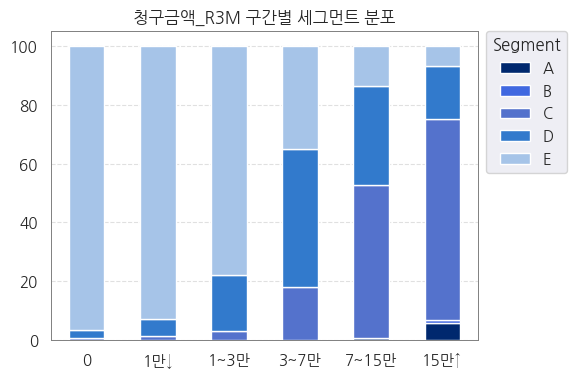

In [106]:
fig, ax = plt.subplots(figsize=(6, 4))

# 금액을 구간(bin)으로 나눔
check_df['청구금액_R3M_bin'] = pd.cut(check_df['청구금액_R3M'],
    bins=[-1, 0, 10000, 30000, 70000, 150000, np.inf],
    labels=['0', '1만↓', '1~3만', '3~7만', '7~15만', '15만↑']
)

# 누적 막대그래프
bin_dist = pd.crosstab(check_df['청구금액_R3M_bin'], check_df['Segment'], normalize='index') * 100
bin_dist.plot(kind='bar', stacked=True, color=colors.values(), ax=ax)

# 공통 스타일 적용
apply_plot_style(ax, fig)

# 제목, 축 레이블, 범례
ax.set_title('청구금액_R3M 구간별 세그먼트 분포')
# ax.set_ylabel('세그먼트 비율 (%)')
ax.set_xlabel('')
# ax.set_xlabel('청구금액_R3M 금액 구간')
ax.legend(title='Segment', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # 라벨 가로로 설정
plt.tight_layout()
plt.show()

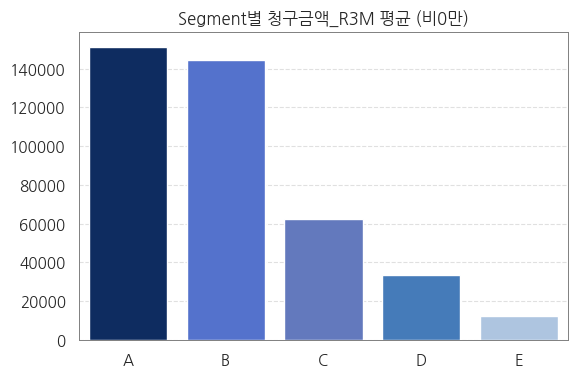

In [ ]:
# 데이터 처리
nonzero_df = check_df[check_df['청구금액_R3M'] != 0]
seg_amount_avg = nonzero_df.groupby('Segment')['청구금액_R3M'].mean().sort_values(ascending=False)

# 시각화
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=seg_amount_avg.index, y=seg_amount_avg.values,
            palette=colors.values(), ax=ax)

apply_plot_style(ax, fig)  # 스타일 적용

# 레이블 및 타이틀
ax.set_title('Segment별 청구금액_R3M 평균 (비0만)')
ax.set_xlabel('')  # x축 레이블 제거 (선택사항)

plt.tight_layout()
plt.show()

청구금액_R3M 금액 구간별로 세그먼트 분포를 비교한 결과,
청구금액이 0인 고객의 대부분은 Segment E에 속한다.

반면, 청구금액이 3만 원 이상인 구간부터는 Segment C, D의 비중이 눈에 띄게 증가하고,금액이 커질수록 Segment A, B까지 분포가 확장되는 양상을 보인다.

특히 15만 원 이상 고금액 구간에서는 E가 거의 존재하지 않으며,
이는 청구금액_R3M이 고객 세그먼트 분류에 있어 매우 강력한 구분 기준이 됨을 시사한다.

### 포인트_적립포인트_R3M

In [ ]:
check_df.groupby('Segment')['포인트_적립포인트_R3M'].agg(['mean', 'median', 'std', 'count'])

,mean,median,std,count
Segment,,,,
A,2560.080247,0.0,4962.146082,162
B,4368.541667,554.5,7011.028188,24
C,2970.105431,0.0,5966.137715,21265
D,2595.023966,0.0,5622.803634,58207
E,906.057510,0.0,3152.215502,320342


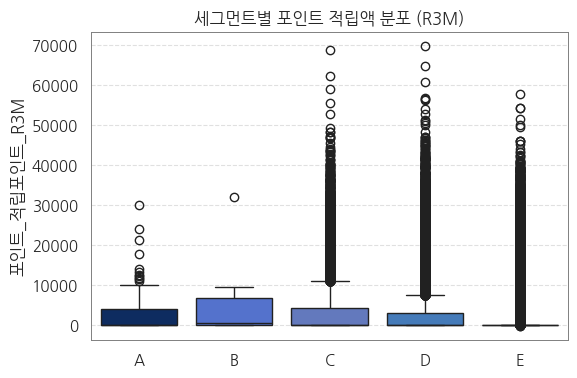

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(x='Segment', y='포인트_적립포인트_R3M',
            data=check_df,
            palette=colors.values(),
            order=segment_order,
            ax=ax)

apply_plot_style(ax, fig)  # 스타일 적용

ax.set_title('세그먼트별 포인트 적립액 분포 (R3M)')
ax.set_xlabel('')

plt.tight_layout()
plt.show()


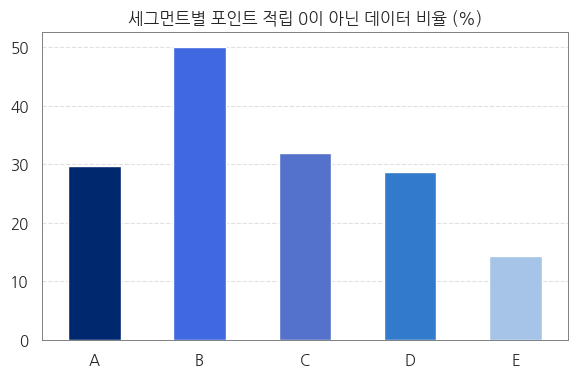

In [ ]:
nonzero_ratio = (
    check_df[check_df['포인트_적립포인트_R3M'] > 0]
    .groupby('Segment').size() / check_df.groupby('Segment').size() * 100
)

fig, ax = plt.subplots(figsize=(6, 4))
nonzero_ratio.plot(kind='bar',
                   ax=ax,
                   title='세그먼트별 포인트 적립 0이 아닌 데이터 비율 (%)',
                   color=list(colors.values()))  # 반드시 list로 변환

apply_plot_style(ax, fig)  # 스타일 적용

ax.set_xlabel('')  # x축 라벨 제거 원하면 추가
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # 라벨 가로로 설정

plt.tight_layout()
plt.show()


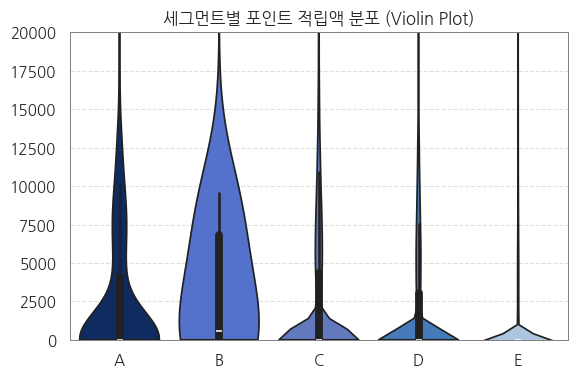

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.violinplot(
    x='Segment',
    y='포인트_적립포인트_R3M',
    data=check_df,
    palette=colors.values(),
    cut=0,
    order=segment_order,
    ax=ax
)

apply_plot_style(ax, fig)  # 스타일 적용

# 제목, 축 설정
ax.set_title('세그먼트별 포인트 적립액 분포 (Violin Plot)')
ax.set_ylim(0, 20000)
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show()

최근 3개월간 적립된 포인트(포인트_적립포인트_R3M)를 기준으로 세그먼트별 분포를 비교한 결과, 포인트 적립 내역이 전혀 없는 고객의 다수는 Segment E에 해당하는 것으로 나타났다.

반면, 일정 수준 이상의 포인트를 적립한 고객일수록 Segment C와 B의 비중이 뚜렷하게 증가하며, 특히 고액 적립 고객의 경우에는 Segment A, B에서 분포가 확장되는 경향을 보였다.

또한 전체 고객 중 약 17.3%가 포인트 적립 이력이 전혀 없는 반면,
Segment B는 절반 이상이 포인트를 적립한 경험이 있는 등 세그먼트 간 명확한 차별성이 확인되었다.

이러한 분포 차이는 포인트_적립포인트_R3M이 고객의 혜택 활용도 및 활동 수준을 반영하며, 세그먼트를 구분하는 데 있어 매우 강력한 기준 변수로 활용될 수 있음을 시사한다.

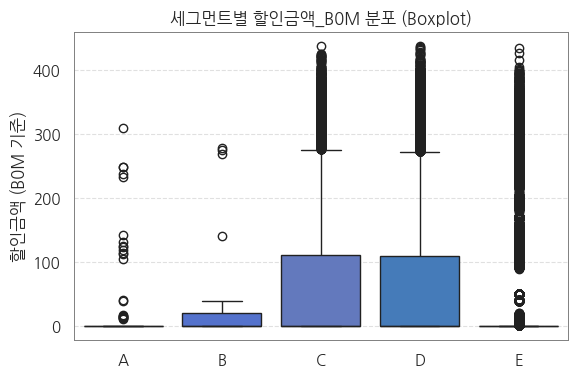

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(
    x='Segment',
    y='할인금액_B0M',
    data=check_df,
    palette=colors.values(),
    order=segment_order,
    ax=ax
)

apply_plot_style(ax, fig)  # 스타일 + 라벨 정렬 적용

ax.set_title('세그먼트별 할인금액_B0M 분포 (Boxplot)')
ax.set_xlabel('')
ax.set_ylabel('할인금액 (B0M 기준)')

plt.tight_layout()
plt.show()

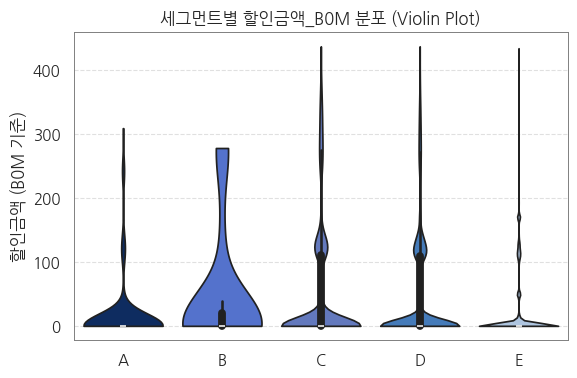

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.violinplot(
    x='Segment',
    y='할인금액_B0M',
    data=check_df,
    palette=colors.values(),
    order=segment_order,
    cut=0,
    ax=ax
)

apply_plot_style(ax, fig)  # 스타일 적용

# 라벨 설정
ax.set_title('세그먼트별 할인금액_B0M 분포 (Violin Plot)')
ax.set_xlabel('')
ax.set_ylabel('할인금액 (B0M 기준)')

plt.tight_layout()
plt.show()

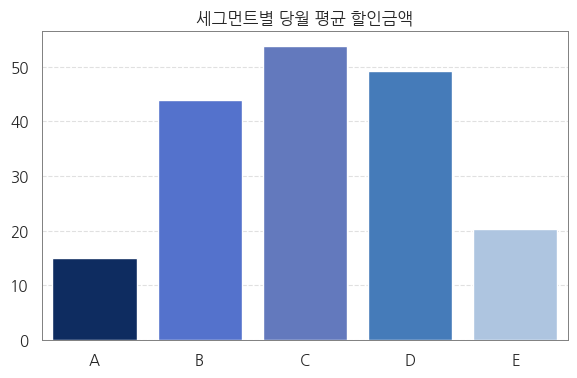

In [ ]:
segment_order = ['A', 'B', 'C', 'D', 'E']

# 세그먼트 순서에 맞게 평균 계산 후 정렬
agg_df = (
    check_df.groupby('Segment')['할인금액_B0M']
    .agg(['mean'])
    .reindex(segment_order)
    .reset_index()
)

# 시각화
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(
    x='Segment',
    y='mean',
    data=agg_df,
    palette=colors.values(),  # 색상 순서 맞추기
    order=segment_order,
    ax=ax
)

apply_plot_style(ax, fig)  # 공통 스타일 적용

# 제목 및 축 설정
ax.set_title('세그먼트별 당월 평균 할인금액')
ax.set_ylabel('')
ax.set_xlabel('')

plt.tight_layout()
plt.show()


최근월(B0M) 기준 할인금액을 세그먼트별로 분석한 결과,
Segment C와 D에서 전체적으로 높은 할인금액 분포를 보이며,
평균 할인금액 역시 각각 약 53원, 49원 수준으로 나타났다.

반면, Segment A와 E는 평균 할인금액이 각각 약 15원, 17원에 불과하며,
할인 경험 및 수혜 규모 측면에서 가시적인 차이를 보였다.

Violinplot을 통해 확인한 결과,
Segment B는 소액 중심의 분포,
Segment C와 D는 고액 할인 고객까지 포함된 넓은 분포폭을 보여
소비 혜택을 적극적으로 받는 고객군으로 해석된다.

이러한 분포 차이는 할인금액_B0M 변수가
세그먼트를 구분하는 데 있어 행동 기반의 정량 지표로 활용 가능함을 시사하며,
특히 우수 고객군(C, D)과 비활성/저가치 고객군(A, E)을 분리하는 데 유효한 변수로 판단된다.

### 할인금액_청구서_R3M

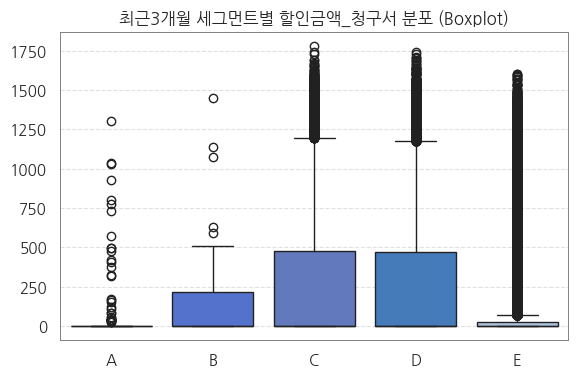

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(
    x='Segment',
    y='할인금액_청구서_R3M',
    data=check_df,
    palette=colors.values(),  # 색상 순서 고정
    order=segment_order,
    ax=ax
)

apply_plot_style(ax, fig)  # ✅ 스타일 함수 적용

# 제목 및 축 라벨
ax.set_title('최근3개월 세그먼트별 할인금액_청구서 분포 (Boxplot)')
ax.set_ylabel('')
ax.set_xlabel('')  # 'Segment' 제거하고 싶다면 공백

plt.tight_layout()
plt.show()


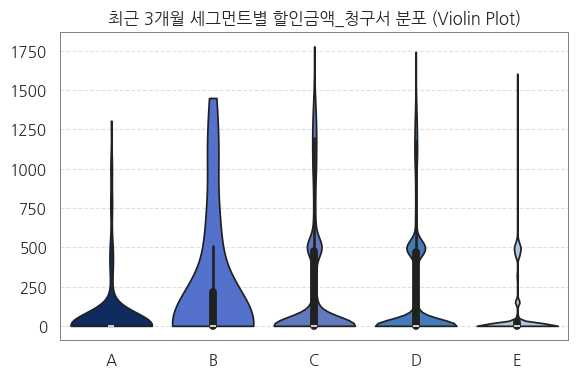

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.violinplot(
    x='Segment',
    y='할인금액_청구서_R3M',
    data=check_df,
    palette=colors.values(),
    order=segment_order,
    cut=0,
    ax=ax
)

apply_plot_style(ax, fig)  # 공통 스타일 적용

# 제목 및 축 라벨
ax.set_title('최근 3개월 세그먼트별 할인금액_청구서 분포 (Violin Plot)')
ax.set_ylabel('')
ax.set_xlabel('')  # Segment 제거하고 싶다면 공백

plt.tight_layout()
plt.show()


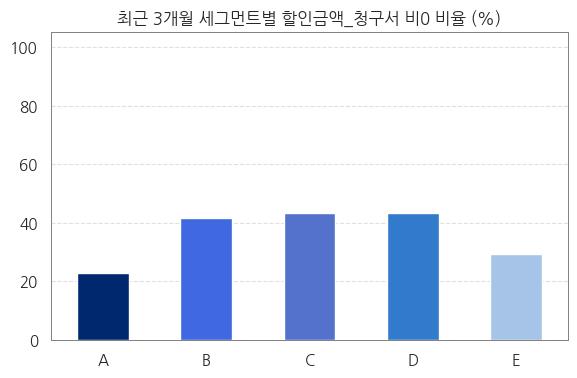

In [ ]:
# 비 0 비율 계산 및 순서 정렬
check_df['nonzero_flag'] = check_df['할인금액_청구서_R3M'] > 0
nonzero_ratio = (
    check_df.groupby('Segment')['nonzero_flag']
    .mean() * 100
).reindex(segment_order)

# 시각화
fig, ax = plt.subplots(figsize=(6, 4))
nonzero_ratio.plot(
    kind='bar',
    color=colors.values(),
    ax=ax
)

apply_plot_style(ax, fig)  # ✅ 스타일 적용

# 제목 및 축 설정
ax.set_title('최근 3개월 세그먼트별 할인금액_청구서 비0 비율 (%)')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # 라벨 가로로 설정
ax.set_ylim(0, 105)

plt.tight_layout()
plt.show()


최근 3개월간 청구서 기준 할인금액(할인금액_청구서_R3M)을 세그먼트별로 분석한 결과,
Segment C와 D가 가장 높은 평균 및 분산을 보이며, 고액 할인 수혜 고객이 다수 포함된 것으로 나타났다.

반면 Segment A는 전체적으로 할인 수혜 규모가 매우 작고,
E 세그먼트는 비 0 비율도 낮아, 해당 그룹은 할인 혜택과의 연관성이 낮은 저활동 고객군으로 해석된다.

Violin Plot 분석에서는 Segment B가 비교적 일정한 범위 내에서 할인 수혜를 받고 있는 실속형 고객군으로 확인된다.

또한, 전체 고객 중 할인금액이 0이 아닌 고객의 비율을 비교한 결과
Segment C, D, B는 모두 40% 이상으로 높은 수혜율을 기록,
할인금액_청구서_R3M은 우수 고객과 일반/저활동 고객을 구분하는 지표로 활용 가능함을 시사한다.

### 잔액_카드론(2 ~ 5)

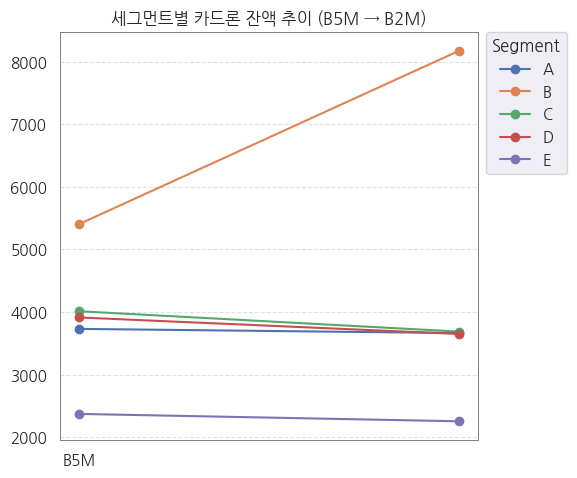

In [108]:
# 1. 세그먼트별 평균 계산
df_ratio = check_df.groupby('Segment')[['잔액_카드론_B5M', '잔액_카드론_B2M']].mean()
df_ratio = df_ratio.rename(columns={'잔액_카드론_B5M': 'B5M', '잔액_카드론_B2M': 'B2M'})
df_ratio = df_ratio.reindex(segment_order)

# 2. 선형 그래프용 데이터 전처리
line_df = df_ratio[['B5M', 'B2M']].T
line_df.columns.name = None
line_df.index.name = '시점'

# 3. 시각화 (라인 차트만)
fig, ax = plt.subplots(figsize=(6, 5))
line_df.plot(marker='o', ax=ax)

# 타이틀 및 축 설정
ax.set_title('세그먼트별 카드론 잔액 추이 (B5M → B2M)')
ax.set_ylabel('')
ax.set_xlabel('')

# 범례 바깥으로 이동
ax.legend(title='Segment', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

apply_plot_style(ax, fig)  # 스타일 적용

plt.tight_layout()
plt.show()

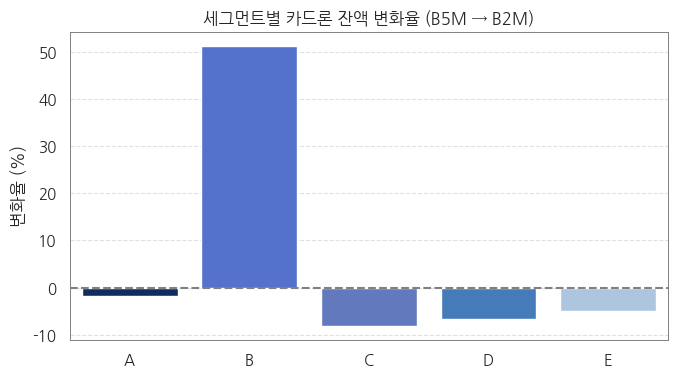

In [ ]:
# 변화율 계산
df_ratio = check_df.groupby('Segment')[['잔액_카드론_B5M', '잔액_카드론_B2M']].mean()
df_ratio['변화율(%)'] = (df_ratio['잔액_카드론_B2M'] - df_ratio['잔액_카드론_B5M']) / df_ratio['잔액_카드론_B5M'] * 100
df_ratio = df_ratio.reindex(segment_order)

# 시각화
fig, ax = plt.subplots(figsize=(7, 4))
sns.barplot(
    x=df_ratio.index,
    y=df_ratio['변화율(%)'],
    palette=colors.values(),
    order=segment_order,
    ax=ax
)

# 스타일 적용 및 커스터마이징
apply_plot_style(ax, fig)
ax.set_title('세그먼트별 카드론 잔액 변화율 (B5M → B2M)')
ax.set_ylabel('변화율 (%)')
ax.set_xlabel('')
ax.axhline(0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()


세그먼트별 카드론 잔액 분석 결과, Segment B는 평균 카드론 잔액이 가장 높고 최근 3개월간(B5M→B2M) 약 50% 수준의 급격한 증가세를 보여, 고액 대출을 활발히 활용하는 적극적인 금융 소비자군으로 해석된다.
반면, Segment D와 E는 평균 잔액이 낮고 변화 폭도 크지 않아 보수적인 대출 성향 또는 카드론 이용도가 낮은 그룹으로 분류된다.
Segment A와 C는 평균 잔액이 중간 수준이며, 잔액 추이 역시 안정적이어서 균형 잡힌 대출 이용 행태를 보이는 고객군으로 판단된다.

### RV_평균잔액/최대잔액_R12M

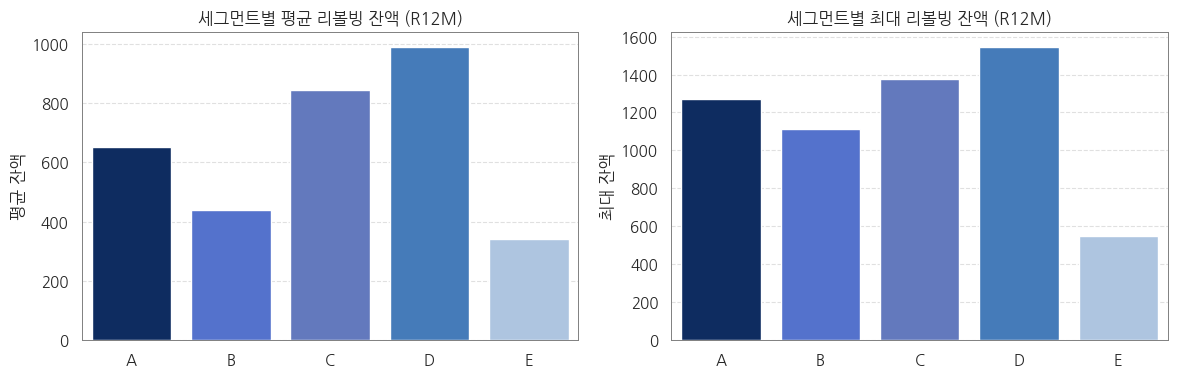

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ▶ 평균잔액 시각화
sns.barplot(
    data=check_df,
    x='Segment',
    y='RV_평균잔액_R12M',
    estimator='mean',
    ci=None,
    palette=colors.values(),
    order=segment_order,
    ax=axes[0]
)
axes[0].set_title('세그먼트별 평균 리볼빙 잔액 (R12M)')
axes[0].set_ylabel('평균 잔액')
axes[0].set_xlabel('')
apply_plot_style(axes[0], fig)

# ▶ 최대잔액 시각화
sns.barplot(
    data=check_df,
    x='Segment',
    y='RV_최대잔액_R12M',
    estimator='mean',
    ci=None,
    palette=colors.values(),
    order=segment_order,
    ax=axes[1]
)
axes[1].set_title('세그먼트별 최대 리볼빙 잔액 (R12M)')
axes[1].set_ylabel('최대 잔액')
axes[1].set_xlabel('')
apply_plot_style(axes[1], fig)

plt.tight_layout()
plt.show()


### 세그먼트별 소비성/대출성 사용 경향 비교

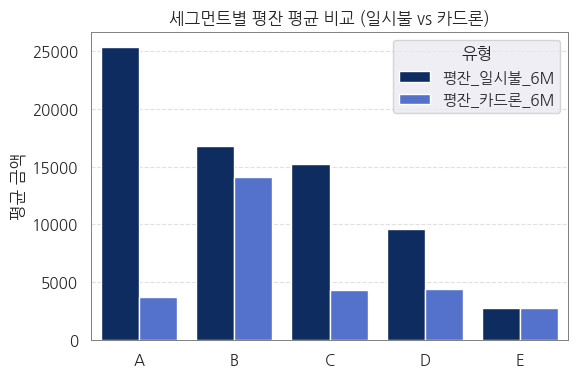

In [ ]:
# 세그먼트별 평균 계산
avg_df = check_df.groupby('Segment')[['평잔_일시불_6M', '평잔_카드론_6M']].mean().reset_index()
avg_df = avg_df[avg_df['Segment'].isin(segment_order)]  # 순서 맞추기 위해 필터링

# melt for long-form
avg_df_melted = avg_df.melt(id_vars='Segment', var_name='유형', value_name='평균금액')

# 시각화
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(
    data=avg_df_melted,
    x='Segment',
    y='평균금액',
    hue='유형',
    palette=colors.values(),
    order=segment_order,
    ax=ax
)

# 스타일 및 설정
apply_plot_style(ax, fig)
ax.set_title('세그먼트별 평잔 평균 비교 (일시불 vs 카드론)')
ax.set_ylabel('평균 금액')
ax.set_xlabel('')

plt.tight_layout()
plt.show()


세그먼트별 평균 잔액 비교 결과, A는 일시불 사용이 압도적으로 높고 카드론은 낮아 소비 여력이 큰 우수 고객군으로 해석되며, B는 일시불과 카드론 모두 높은 수준으로 대출 의존도가 높은 활발한 고객군으로 나타났습니다. C는 중간 수준의 소비 중심 고객군으로 보이며, D와 E는 일시불과 카드론 모두 낮아 전반적으로 활동성이 낮은 고객군으로 판단됩니다.

## 소비성향 파악

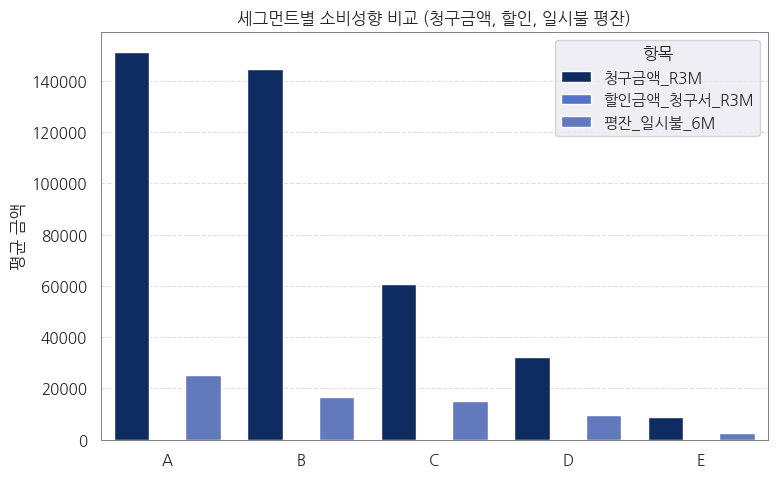

In [ ]:
# 세그먼트별 평균 계산
spending_df = check_df.groupby('Segment')[['청구금액_R3M', '할인금액_청구서_R3M', '평잔_일시불_6M']].mean().reset_index()
spending_df = spending_df[spending_df['Segment'].isin(segment_order)]

# long-form 변환
spending_df_melted = spending_df.melt(id_vars='Segment', var_name='항목', value_name='평균금액')

# 시각화
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    data=spending_df_melted,
    x='Segment',
    y='평균금액',
    hue='항목',
    palette=colors.values(),
    order=segment_order,
    ax=ax
)

# 스타일 적용
apply_plot_style(ax, fig)

# 제목 및 레이블 설정
ax.set_title('세그먼트별 소비성향 비교 (청구금액, 할인, 일시불 평잔)')
ax.set_ylabel('평균 금액')
ax.set_xlabel('')

plt.tight_layout()
plt.show()


## 대출 성향 파악

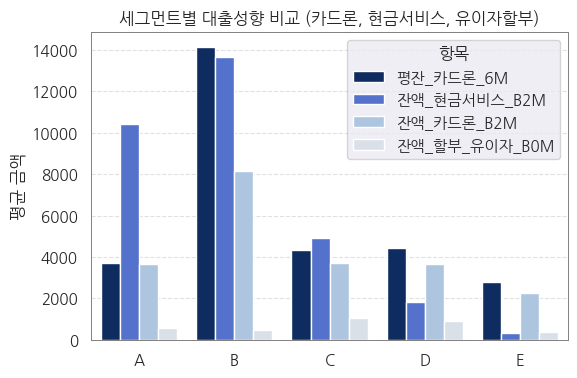

In [110]:
# 세그먼트별 평균 계산
loan_df = check_df.groupby('Segment')[
    ['평잔_카드론_6M', '잔액_현금서비스_B2M', '잔액_카드론_B2M', '잔액_할부_유이자_B0M']
].mean().reset_index()
loan_df = loan_df[loan_df['Segment'].isin(segment_order)]

# long-form 변환
loan_df_melted = loan_df.melt(id_vars='Segment', var_name='항목', value_name='평균금액')

# 시각화
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(
    data=loan_df_melted,
    x='Segment',
    y='평균금액',
    hue='항목',
    palette=colors.values(),
    order=segment_order,
    ax=ax
)

# 스타일 적용
apply_plot_style(ax, fig)

# 제목 및 레이블
ax.set_title('세그먼트별 대출성향 비교 (카드론, 현금서비스, 유이자할부)')
ax.set_ylabel('평균 금액')
ax.set_xlabel('')

plt.tight_layout()
plt.show()


대출 관련 항목은 세그먼트 구분에 있어 B세그먼트와 E세그먼트 식별에 높은 기여도를 보인다. 특히 카드론과 현금서비스 평균잔액이 높은 B세그먼트는 대출 성향이 뚜렷하며, 반대로 E세그먼트는 모든 항목에서 낮은 수치를 기록해 대출 비활용 고객군으로 구분된다. 이는 대출 항목들이 세그먼트 분류에서 중요한 변수로 활용될 수 있음을 시사한다.

## 혜택 활용도 분석

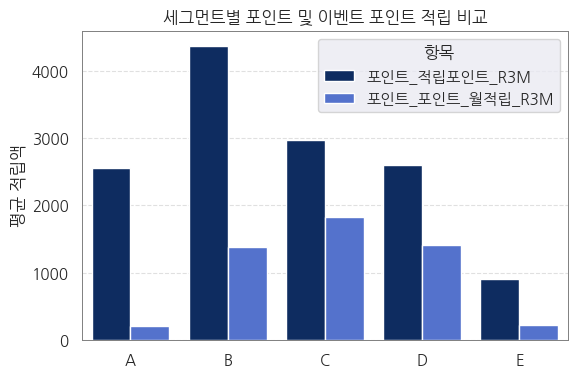

In [ ]:
# 세그먼트별 평균 계산
reward_df = check_df.groupby('Segment')[
    ['포인트_적립포인트_R3M', '포인트_포인트_월적립_R3M']
].mean().reset_index()
reward_df = reward_df[reward_df['Segment'].isin(segment_order)]

# long-form 변환
reward_df_melted = reward_df.melt(id_vars='Segment', var_name='항목', value_name='평균적립액')

# 시각화
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(
    data=reward_df_melted,
    x='Segment',
    y='평균적립액',
    hue='항목',
    palette=colors.values(),
    order=segment_order,
    ax=ax
)

# 스타일 적용
apply_plot_style(ax, fig)

# 제목 및 레이블
ax.set_title('세그먼트별 포인트 및 이벤트 포인트 적립 비교')
ax.set_ylabel('평균 적립액')
ax.set_xlabel('')

plt.tight_layout()
plt.show()


포인트 적립 분석 결과, B세그먼트는 일반 포인트와 이벤트성 포인트 모두에서 가장 높은 적립을 보여 마케팅 반응도가 가장 높은 그룹으로 확인된다. 반면 A, E세그먼트는 이벤트 포인트 적립이 거의 없어 프로모션 효과가 낮은 그룹으로 분류된다. 포인트 적립 지표는 고객의 활동성과 마케팅 반응도 기반 세그먼트 구분에 효과적으로 활용될 수 있다.